In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.get_option("display.max_columns",None)
pd.get_option("display.max_rows", None)
import seaborn as sns
import matplotlib.font_manager
#import plotly.plotly  as py
#import plotly.graph_objs as go
#plotly.tools.set_credentials_file(username='***', api_key='***')

In [2]:
pre_app = pd.read_csv('pre_app_clean.csv')
app = pd.read_csv('app_clean.csv')

In [3]:
app = pre_app.merge(app, how = 'inner', on = 'id_curr')

In [4]:
target1 = app[app['target'] == 1]
target0 = app[app['target'] == 0]

In [5]:
men = app[app['gender'] == 'M']
women = app[app['gender'] == 'F']


In [6]:
rej = app[app['status'] == 'Refused']
approv = app[app['status'] == 'Approved']


In [7]:
type_credit = app['credit_type'].value_counts()
type_credit = (type_credit/app.shape[0])*100
type_credit

Cash loans         91.611302
Revolving loans     8.388698
Name: credit_type, dtype: float64

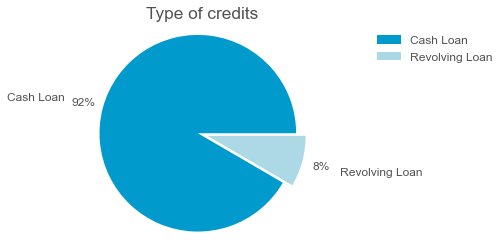

In [8]:
fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#525252'
plt.rcParams['axes.labelcolor']= '#525252'
plt.rcParams['xtick.color'] = '#525252'
plt.rcParams['ytick.color'] = '#525252'
plt.rcParams['font.size']=12

color_palette_list = ['#009ACD', '#ADD8E6', '#63D1F4', '#0EBFE9',   
                      '#C1F0F6', '#0099CC']

labels = ['Cash Loan', 'Revolving Loan']
percentages = [type_credit[0], type_credit[1]]
explode=(0.1,0)

ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list[0:2], autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Type of credits", color = '#525252')
ax.legend(frameon=False, bbox_to_anchor=(1.4,1))

plt.savefig('./Figures/credit_type.png', bbox_inches = 'tight')


In [9]:
tt = target1['credit_type'].value_counts()
print(tt)

tttt = target0['credit_type'].value_counts()
print(tttt)
total = app['credit_type'].value_counts()
print(total)

tt = (tt/app.shape[0])*100
tttt = (tttt/app.shape[0])*100

credit_type_default = [tttt[0],tt[0],tttt[1],tt[1]]
credit_type_default = np.array(credit_type_default)
print(credit_type_default)
type(credit_type_default)

Cash loans         92928
Revolving loans     4822
Name: credit_type, dtype: int64
Cash loans         839359
Revolving loans     80546
Name: credit_type, dtype: int64
Cash loans         932287
Revolving loans     85368
Name: credit_type, dtype: int64
[82.47972053  9.13158192  7.91486309  0.47383445]


numpy.ndarray

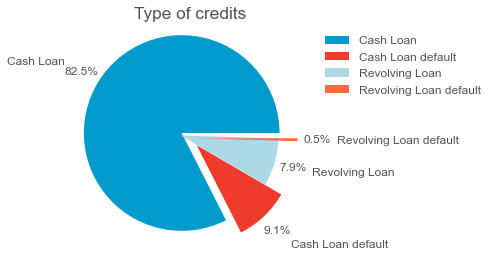

In [10]:
fig, ax = plt.subplots()

plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['text.color'] = '#525252'
plt.rcParams['axes.labelcolor']= '#525252'
plt.rcParams['xtick.color'] = '#525252'
plt.rcParams['ytick.color'] = '#525252'
plt.rcParams['font.size']=12

color_palette_list = ['#009ACD', '#ef3b2c','#ADD8E6', '#fb6a4a']

labels = ['Cash Loan', 'Cash Loan default','Revolving Loan','Revolving Loan default']
percentages = credit_type_default
explode=(0.1,0.1,-0.1,0.1)

ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Type of credits", color = '#525252')
ax.legend(frameon=False, bbox_to_anchor=(1.4,1))

plt.savefig('./Figures/credit_type.png', bbox_inches = 'tight')


In [11]:
credit_gender = app['gender'].value_counts()
credit_gender = (credit_gender/app.shape[0])*100
credit_gender


F    63.533024
M    36.466976
Name: gender, dtype: float64

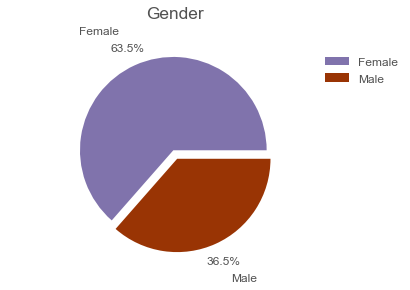

In [12]:



fig, ax = plt.subplots()

#plt.rcParams['font.sans-serif'] = 'Arial'
#plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['text.color'] = '#525252'
#plt.rcParams['axes.labelcolor']= '#525252'
#plt.rcParams['xtick.color'] = '#525252'
#plt.rcParams['ytick.color'] = '#525252'
#plt.rcParams['font.size']=12

color_palette_list = ['#8073ac', '#993404']

labels = ['Female', 'Male']
percentages = credit_gender
explode=(0.1,0)

ax.pie(percentages, explode=explode, labels=labels,  
       colors=color_palette_list, autopct='%1.1f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Gender", color = '#525252',y=1.1)
ax.legend(frameon=False, bbox_to_anchor=(1.2,1))

plt.savefig('./Figures/credit_gender.png', bbox_inches = 'tight')


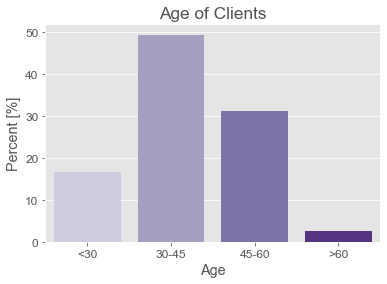

In [13]:
# Percentage of defaults (defaults per age group compared to total defaults)

age =app['age_range'].value_counts()
total = app.shape[0]
age_perc = (age/total)*100
age_perc = age_perc.sort_values(ascending = False)

ax = sns.barplot(x = age_perc.index, y = age_perc.values,\
                order = ['<30','30-45','45-60','>60'],\
                 palette = ['#cbc9e2','#9e9ac8','#756bb1','#54278f'])
ax.set(xlabel = 'Age', ylabel ='Percent [%]')

ax.set_title('Age of Clients', color = '#525252')

plt.savefig('./Figures/credit_age.png', bbox_inches = 'tight')


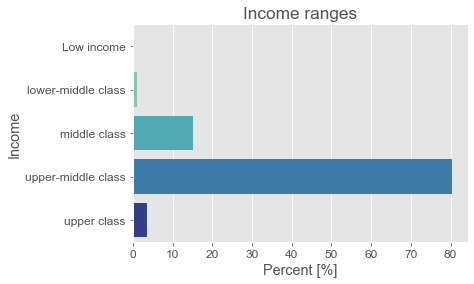

In [14]:
# Percentage of defaults (defaults per age group compared to total defaults)

inc =app['income_range'].value_counts()
total = app.shape[0]
inc_perc = (inc/total)*100
inc_perc = inc_perc.sort_values(ascending = False)

ax = sns.barplot(y = inc_perc.index, x = inc_perc.values,\
                order = ['Low income','lower-middle class','middle class',\
                                'upper-middle class','upper class'],\
                 palette = ['#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494'])
ax.set(ylabel = 'Income', xlabel ='Percent [%]')

ax.set_title('Income ranges', color = '#525252')

plt.savefig('./Figures/income.png', bbox_inches = 'tight')


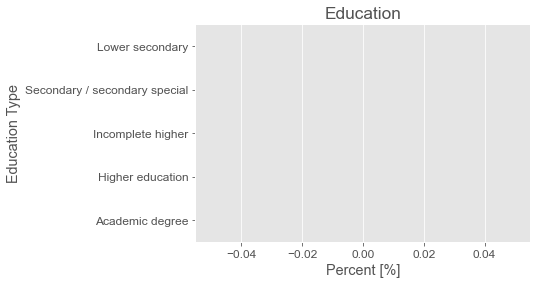

In [15]:

edu =app['education'].value_counts()
total = app.shape[0]
edu_perc = (edu/total)*100
edu_perc = age_perc.sort_values(ascending = False)

ax = sns.barplot(y = edu_perc.index, x = edu_perc.values,\
                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
                          'Higher education','Academic degree'],\
                 palette = ['#d9f0a3','#addd8e','#78c679','#31a354','#006837'])
ax.set(ylabel = 'Education Type', xlabel ='Percent [%]')

ax.set_title('Education', color = '#525252')

plt.savefig('./Figures/education.png', bbox_inches = 'tight')


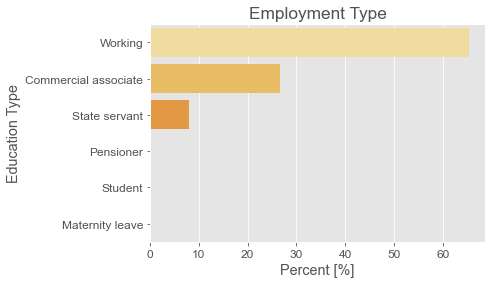

In [16]:
in_type =app['income_type'].value_counts()
in_type_perc= (in_type/app.shape[0])*100
in_type_perc = in_type_perc.sort_values(ascending = False)

ax = sns.barplot(y = in_type_perc.index, x = in_type_perc.values,\
#                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
 #                         'Higher education','Academic degree'],\
               palette = ['#fee391','#fec44f','#fe9929','#ec7014','#cc4c02','#8c2d04'])
ax.set(ylabel = 'Education Type', xlabel ='Percent [%]')

ax.set_title('Employment Type', color = '#525252')

plt.savefig('./Figures/empl_type.png', bbox_inches = 'tight')


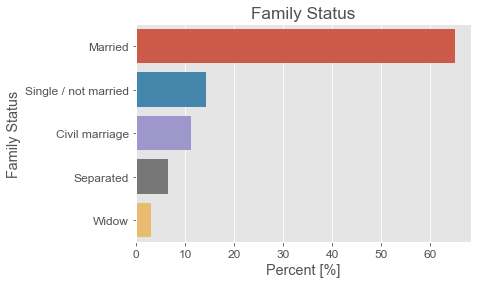

In [17]:
fam =app['family_status'].value_counts()
fam_perc= (fam/app.shape[0])*100
fam_perc = fam_perc.sort_values(ascending = False)

ax = sns.barplot(y = fam_perc.index, x = fam_perc.values,)
#                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
 #                         'Higher education','Academic degree'],\
  #               palette = ['#d9f0a3','#addd8e','#78c679','#31a354','#006837'])
ax.set(ylabel = 'Family Status', xlabel ='Percent [%]')

ax.set_title('Family Status', color = '#525252')

plt.savefig('./Figures/family_status.png', bbox_inches = 'tight')


92% Cash loans
50% between 30-45
63% Female

80% Upper-Middle Class
74% Secondary education
67% Married
66% Working

In [18]:
age_perc

30-45    49.410065
45-60    31.242808
<30      16.677853
>60       2.669274
Name: age_range, dtype: float64

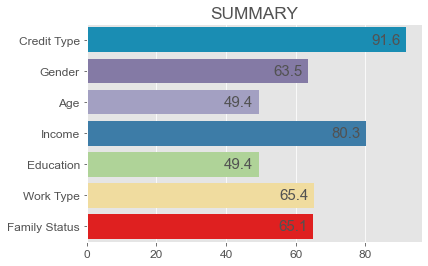

In [19]:
summary = pd.Series([type_credit[0],credit_gender[0],age_perc[0],\
           inc_perc[0],edu_perc[0],in_type_perc[0],fam_perc[0]])

summary.index = ['Credit Type','Gender','Age','Income','Education','Work Type','Family Status']
summary

color_summary = ['#009ACD','#8073ac','#9e9ac8', '#2c7fb8','#addd8e','#fee391','red']
ax = sns.barplot(y = summary.index, x = summary.values,palette = color_summary) 
#                 order = ['Lower secondary','Secondary / secondary special','Incomplete higher',
 #                         'Higher education','Academic degree'],\
  #               
#ax.set(ylabel = 'Family Status', xlabel ='Percent [%]')

ax.set_title('SUMMARY', color = '#525252')

#plt.savefig('./Figures/family_status.png', bbox_inches = 'tight')


for p in ax.patches:
    ax.annotate(format(p.get_width(), '.1f'), 
                   ( p.get_width(), p.get_y() + p.get_height() / 2.), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (-20,0), 
                   textcoords = 'offset points')

plt.savefig('./Figures/SUMMARY.png', bbox_inches = 'tight')

